In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from scipy.stats import pearsonr
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [46]:
df = pd.read_csv('salario.csv', delimiter=';', decimal=',')

In [47]:
df.head()

salario   posicao  anosexperiencia   sexo
0       148        7             16.7      1
1       165        7              6.7      1
2       145        5             14.8      1
3       139        7             13.9      0
4       142        6              6.4      0

Removendo espaços em branco no nome das colunas

In [48]:
df.columns = df.columns.str.strip()

Plotando gráfico de dispersão entre as variáveis de interesse

In [57]:
dfModel = pd.get_dummies(df, columns=['posicao'], drop_first=True, dtype=int)
dfModel

salario  anosexperiencia  sexo posicaoC  posicao_2  posicao_3  posicao_4  \
0      148             16.7     1        7          0          0          0   
1      165              6.7     1        7          0          0          0   
2      145             14.8     1        5          0          0          0   
3      139             13.9     0        7          0          0          0   
4      142              6.4     0        6          0          0          0   

   posicao_5  posicao_6  posicao_7  posicao_8  posicao_9  
0          0          0          1          0          0  
1          0          0          1          0          0  
2          1          0          0          0          0  
3          0          0          1          0          0  
4          0          1          0          0          0

<Axes: xlabel='anosexperiencia', ylabel='salario'>

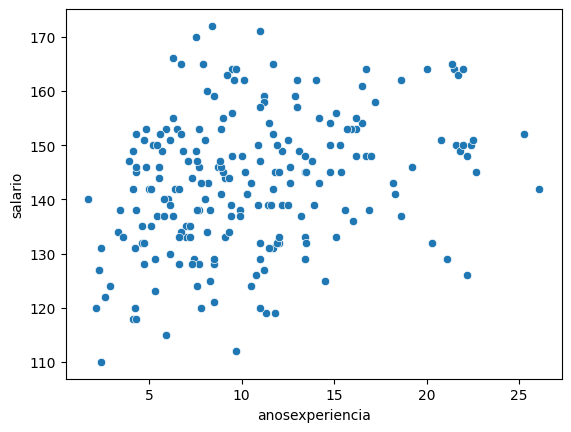

In [54]:
sbn.scatterplot(x = 'anosexperiencia', y = 'salario', data = df)

Calculando a correlação de Pearson

In [6]:
pearsonr(df['anosexperiencia'], df['salario'])




PearsonRResult(statistic=0.3117473207897745, pvalue=2.409206280104948e-06)

<Axes: xlabel='salario', ylabel='Count'>

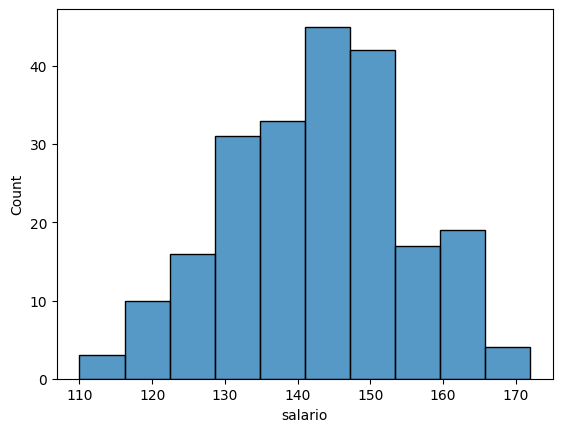

In [8]:
sbn.histplot(x = 'salario', data = df, bins = 10)

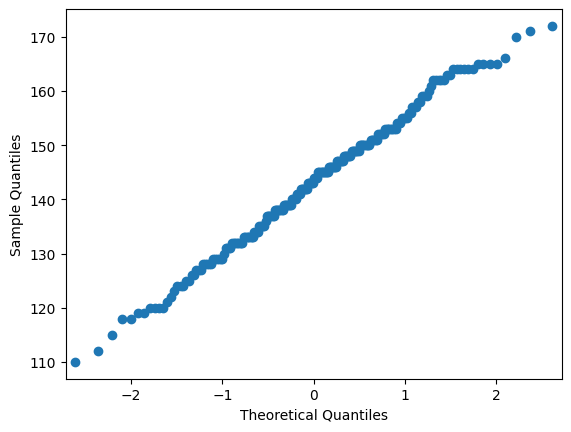

In [9]:
sm.qqplot(df['salario'])
plt.show()

**Teste de Normalidade de Shapiro Wilks**

In [10]:
stats.shapiro(df['salario'])

ShapiroResult(statistic=0.9927941302720197, pvalue=0.35960822490701955)

**Modelo de Regressão Linear**

In [55]:
dfModel.head()

salario  posicao  anosexperiencia  sexo  posicaoC_2  posicaoC_3  \
0      148        7             16.7     1       False       False   
1      165        7              6.7     1       False       False   
2      145        5             14.8     1       False       False   
3      139        7             13.9     0       False       False   
4      142        6              6.4     0       False       False   

   posicaoC_4  posicaoC_5  posicaoC_6  posicaoC_7  posicaoC_8  posicaoC_9  
0       False       False       False        True       False       False  
1       False       False       False        True       False       False  
2       False        True       False       False       False       False  
3       False       False       False        True       False       False  
4       False       False        True       False       False       False

In [58]:
# Separar variável resposta de explicativas

y = dfModel['salario']
X = dfModel[['anosexperiencia', 'sexo', 'posicao_2',
       'posicao_3', 'posicao_4', 'posicao_5', 'posicao_6', 'posicao_7',
       'posicao_8', 'posicao_9']]

In [60]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)

# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
modelo = sm.OLS(y, X_sm).fit()

# mostrando as estatísticas do modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     53.86
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.15e-52
Time:                        21:10:09   Log-Likelihood:                -727.49
No. Observations:                 220   AIC:                             1477.
Df Residuals:                     209   BIC:                             1514.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             121.5300      4.809     25.270      0.000     112.049     131.011
anosexperiencia    -0.4435      0.118     -3.749      0.000      -0.677      -0.210
sexo               -2.4922      1.096     -2.274      0.024      -4.653      -0.332
posicao_2           5.0141      5.183      0.967      0.334      -5.204      15.232
posicao_3          14.2001      4.964      2.860      0.005       4.414      23.987
posicao_4          19.6653      4.976      3.952      0.000       9.855      29.475
posicao_5          28.5987      4.986      5.736      0.000      18.769      38.428
posicao_6          33.6658      4.991      6.746      0.000      23.827      43.505
posicao_7          41.5121      5.088      8.159      0.000      31.482      51.542
posicao_8          44.8064      5.399      8.298      0.000      34.162      55.451
posicao_9          51.7204      5.948      8.695      0.000      39.994      63.447
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.844
Skew:                           0.104   Prob(JB):                        0.656
Kurtosis:                       3.221   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Valores residuais**

In [61]:
# Construção de diagnóstico para os gráficos
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados
modelo_residuos = modelo.resid # Residuos
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados
modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados
modelo_outliers = modelo.get_influence().hat_matrix_diag # Outliers
distancia_cook = modelo.get_influence().cooks_distance[0] # Distanci de Cook

Text(0, 0.5, 'Residuals')

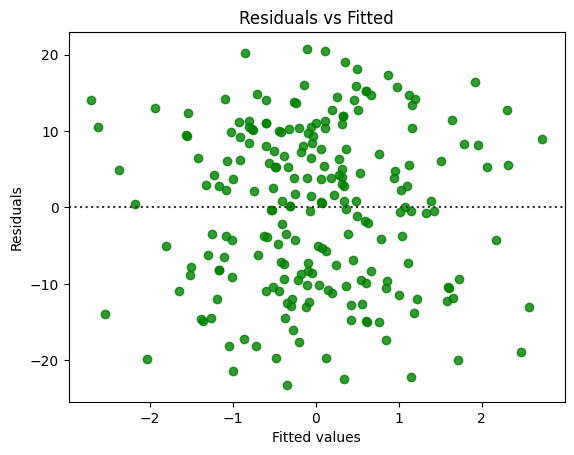

In [63]:
plot_lm = plb.figure()
plot_lm = sbn.residplot(x = modelo_norm_resid, y = modelo_ajust_y, lowess=False, color="g")
plot_lm.set_title('Residuals vs Fitted')
plot_lm.set_xlabel('Fitted values')
plot_lm.set_ylabel('Residuals')

**MAE**

In [64]:
MAE = mean_absolute_error(
    y_true = y, # valor verdadeiro
    y_pred = modelo_ajust_y # predições
)
MAE.round(2)

5.13

**MSE**

In [65]:
MSE = mean_squared_error(
    y_true= y, # valor verdadeiro
    y_pred= modelo_ajust_y # predições
)
MSE.round(2)

43.63

**RMSE**

In [66]:
RMSE = MSE**(1/2)
RMSE.round(2)

6.61